In [1]:
!pwd
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import sys
sys.executable

/c/Users/81908/jupyter_notebook/tfgpu_py36_work/02_keras_py/experiment/01_code_test


'C:\\Users\\81908\\Anaconda3\\envs\\tfgpu\\python.exe'

# コードのテスト
tf_grad_cam.py の関数について

In [2]:
keras_py_path = r'C:\Users\81908\jupyter_notebook\tfgpu_py36_work\02_keras_py'
sys.path.append(keras_py_path)
from predicter import tf_grad_cam as grad_cam

out_jpg: ./cat_dog_classidx0_gradcam.jpg


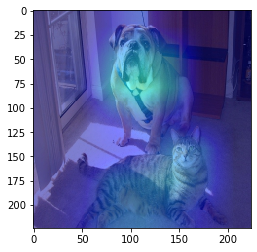

out_jpg: ./cat_dog_classidx242_gradcam.jpg


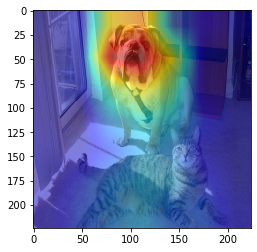

out_jpg: ./cat_dog_classidx282_gradcam.jpg


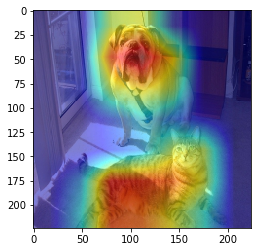

In [3]:
import numpy as np
from tensorflow import keras
keras.backend.clear_session()
keras.backend.set_learning_phase(0)

image_path = r'cat_dog.png'
#model = keras.models.load_model(r'output_dir\VGG16.h5', compile=compile)
model = keras.applications.vgg16.VGG16(weights='imagenet') # imagenet_vgg16モデルロード

x = grad_cam.image2numpy_keras(image_path, [224,224,3]) # 画像ファイルをリサイズしてnp.arrayにする
X = np.expand_dims(x, axis=0)
X = X.astype('float32')
X = keras.applications.vgg16.preprocess_input(X) # imagenet_vgg16の画像前処理

for class_idx in [0, 242, 282]:
    grad_cam_img = grad_cam.image2gradcam(model, image_path, X=X, class_idx=class_idx)# , layer_name='block5_conv3'

    # 画像表示
    from PIL import Image
    import matplotlib.pyplot as plt
    import numpy as np
    %matplotlib inline
    im = Image.open(f"./cat_dog_classidx{class_idx}_gradcam.jpg")
    im_list = np.asarray(im)
    plt.imshow(im_list)
    plt.show()

out_jpg: ./cat_dog_classidx0_gradcam.jpg


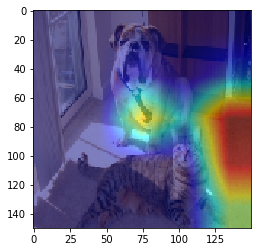

out_jpg: ./cat_dog_classidx1_gradcam.jpg


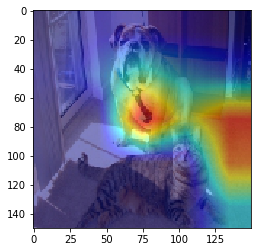

In [4]:
import numpy as np
from tensorflow import keras
keras.backend.clear_session()
keras.backend.set_learning_phase(0)

image_path = r'cat_dog.png'
model_path = r'D:\work\chart_model\output\model\tf_base_class_all_py\best_val_loss.h5'

for class_idx in [0, 1]:
    model = keras.models.load_model(model_path, compile=False) # モデルロード
    grad_cam_img = grad_cam.image2gradcam(model, image_path, class_idx=class_idx)

    # 画像表示
    from PIL import Image
    import matplotlib.pyplot as plt
    import numpy as np
    %matplotlib inline
    im = Image.open(f"./cat_dog_classidx{class_idx}_gradcam.jpg")
    im_list = np.asarray(im)
    plt.imshow(im_list)
    plt.show()